# <center> *Tarea Numérica MA2601 Ecuaciones Diferenciales Ordinarias*


<center>

Escuela de Ingeniería, FCFM, U. de Chile. Semestre 2022-1

Profesores: Alexander Frank, Álvaro Hernández, Axel Osses, Jorge Aguayo, Alexis Fuentes

Ayudante coordinador: Diego Olguín

Alumna: Antonia Ignacia Valenzuela Castro, RUT: 21.200.782-K, Sección: 4

*Modelo social de interacción humanidad-naturaleza-desigualdad.*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp


Parte 0

Importe las librerías necesarias (Numpy, Matplotlib, Scipy) y primero defina todas las constantes mencionadas anteriormente, excepto $k$, $D$ y ${x_{E}}(0)$. Luego programe  5 funciones que calculen los valores de ${a_{c}}$, $C_{c}$, $C_{E}$, $a_{1}$ y $a_{2}$.

In [2]:
#constantes

a_s= 10**(-2)
ah= 7*10**(-2)
b1= 3*10**(-2)
b2=3*10**(-2)
s= 5*10**(-4)
p = 5*10**(-3)
r= 10**(-2)
L= 10**2



In [3]:
#funciones
#como x_C está destinado a ser un arreglo y mis funciones trabajan con números\\
#para evitar confusiones denoté la dependencia de x_C en las funciones como x.

def ac(p,x,xE,k):
    return p*(x + k*xE)


def CC(s,x,a,p,k,xE):
    def mínimo(a,p,x,xE,k):
      return min(1,(a/(ac(p,x,xE,k))))

    return s*x*mínimo(a,p,x,xE,k)


def cE(k,s,a,p,xE,x):
    def mínimo(a,p,x,xE,k):
      return min(1,(a/ac(p,x,xE,k)))

    return k*s*xE*mínimo(a,p,x,xE,k)

def a1(ah,a_s,s,a,p,k,x,xE):

      def máximo(s,x,a,p,k,xE):
        return max(0, (1-(CC(s,x,a,p,k,xE)/(s*x))))

      return a_s + máximo(s,x,a,p,k,xE)*(ah - a_s)


def a2(ah,a_s,s,a,p,k,x,xE):

    def máximo(s,x,a,p,k,xE):
        return max(0, (1-(cE(k,s,a,p,xE,x)/(s*xE))))


    return a_s + máximo(s,x,a,p,k,xE)*(ah - a_s)





Parte 1: Modelo simplificado a una EDO

Para esta parte con $x_E$=0, $y=50$, $a=250$ constantes. Escriba la EDO resultante y resuélvala numéricamente utilizando los métodos de Euler progresivo, Heun y Runge Kutta 4. Utilice D y k cualquiera, $h=1$ en años.

Entonces, la EDO resultante sería:

$x'_C= b_1\cdot x_C - a_1 \cdot x_C$

1) Euler progresivo:

Para resolverla mediante este método primero vamos a plantear el problema de Cauchy:

$x'_C= f(t,x_C)$    $∀ t \geq 0$ \\
$x_C(0)=10^2$


Al integrar esta ecuación nos resulta:

$$ x_C(t_{n+1}) - x_C(t_{n}) = \int_{t_n}^{t_{n+1}}f(s,x_C(s))\, ds $$

Cuya integral del lado derecho se aproxima de la siguiente forma:

$$ \int_{t_n}^{t_{n+1}}f(s,x_C(s))\, ds \approx (t_{n+1}-t_n) \cdot f(t_n,x_C(t_n)) = h \cdot f(t_n,x_{C}(t_n))$$

lo cual sugiere definir:

$x_{C{n+1}} = x_{C{n}} + h \cdot f(t_n,x_{C{n}})$

Primero definimos la función del lado derecho y luego discretizamos un intervalo en el cual vivirá la sucesión $t_n$.




In [4]:
# constantes

xE=0
y=50
a=250
x_Co=10**2
k=10**2
D=1
N=1000

In [5]:
#Definimos la función

#Guardamos en una lista todas las constantes que reclama la definición de f
args= [ah,a_s,a,s,p,b1,xE]

def f(t,x, args):
     return b1*x - a1(ah,a_s,s,a,p,k,x,xE)*x


#Hacemos euler progresivo

def Euler_prog(f,ti,tf,x_Co,N,b1):
    # Intervalo
    I = np.linspace(ti,tf,N)

    # Paso h
    h = (tf-ti)/N

    # Arreglo para x_C
    x_C = np.zeros(N)

    # Condición inicial
    x_C[0] = x_Co

    # Programamos la recurrencia para ir asignando nuevos valores al arreglo creado
    for i in range(N-1):
        x_C[i+1] = x_C[i] + h*f(I[i],x_C[i],args)

    # Devolvemos tanto intervalo como la solución numérica para x_C
    return (I,x_C)


In [6]:
#Generamos la solución:

I,x_C= Euler_prog(f,0,1000,x_Co,N,b1)


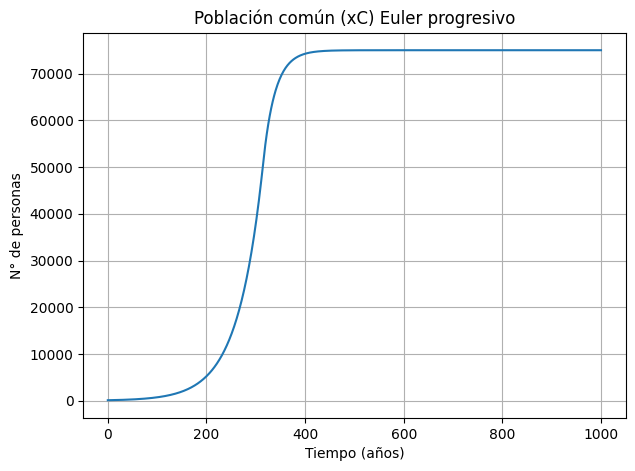

In [7]:
import matplotlib.pyplot as plt

# Figura y tamaño de la figura

plt.figure(figsize=(7,5))

# Gráfico
plt.plot(I,x_C)

# Título
plt.title("Población común (xC) Euler progresivo")

# Ejes
plt.xlabel("Tiempo (años)")
plt.ylabel("N° de personas")

plt.grid(True)

# Mostramos la figura
plt.show()

2) Método de Heun \\
En esta ocasión utilizamos la regla de los trapecios para aproximar la integral:

$$ \int_{t_n}^{t_{n+1}}f(s,x_C(s))\, ds \approx \frac{h}{2} \cdot [f(t_n,x_{C{n}}) + f(t_{n+1},x_C(t_{n+1})] $$.

En este caso, se estima el valor de $x_{C}(t_{n+1})$ mediante Euler progresivo:

$$ x_{C{n+1}} = x_{C{n}} + hf(t_n,x_{C{n}})$$

y resulta:

$$ x_{C{n+1}} = x_{C{n}} + \frac{h}{2} \cdot [f(t_n,x_{C{n}}) + f(t_{n+1},x_{C{n+1}})]$$



In [8]:
#Como ya se programó la función del lado derecho anteriormente, \
#podemos derechamente programar la aproximación de la integral:

h=1

def Heun(f,ti,tf,x_Co,h):

    # Paso h, definimos la cantidad de puntos N en función de h
    N = int((tf-ti)/h)

    I = np.linspace(ti,tf,N)

    #Arreglo
    X=np.zeros(N)

    # Condición inicial
    X[0] = x_Co

    #hacemos la recurrencia:
    for i in range(N-1):

      #paso intermedio:
       X_C= X[i]+ h*f(I[i],X[i],args) #Euler progresivo, X_C sería X[i+1],\\
       #hacemos este paso para que Heun no sea un método implícito.

       #Aproximación por método de Heun;
       X[i+1]= X[i] + h/2*(f(I[i],X[i],args)+f(I[i+1],X_C, args))


    return (I,X)




In [9]:
I,X= Heun(f,0,1000,x_Co,h)

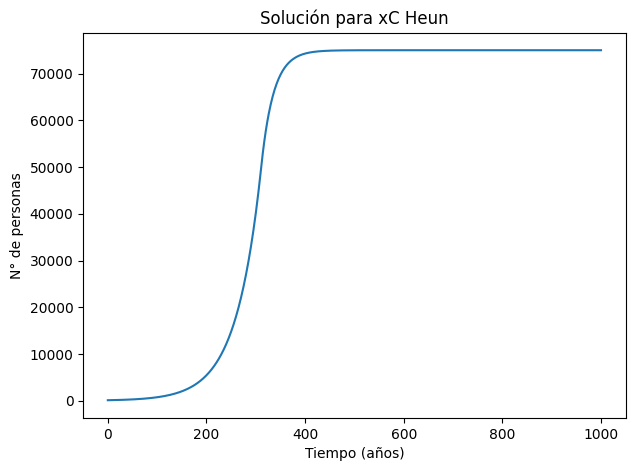

In [10]:
# Figura y tamaño de la figura

plt.figure(figsize=(7,5))

# Gráfico
plt.plot(I,X)

# Título
plt.title("Solución para xC Heun")

# Ejes
plt.xlabel("Tiempo (años)")
plt.ylabel("N° de personas")

# Mostramos la figura
plt.show()

3) Método de Runge Kutta 4

Al hacer una cuadratura de tipo Simpson para la integral

$$ $$
$$ \int_{x_n}^{x_{n+1}}f(s,y(s))ds \sim \frac{h}{2}\left( f(x_n,y(x_n))+2f(x_{n+\frac{1}{2}},y(x_{n+\frac{1}{2}}))+f(x_{n+1},y(x_{n+1})) \right), $$
donde $x_{n+\frac{1}{2}}=x_n+\frac{h}{2}$.


In [11]:
def RK4(f,ti,tf,x_Co,h):
    # Calculamos N en base a h
    N = int((tf-ti)/h)

    # Intervalo
    I = np.linspace(ti,tf,N)

    XC = np.zeros(N)


    XC[0] = x_Co

    # Recurrencia
    for i in range(N-1):
        # Pasos intermedios
        g1 = f(I[i]    , XC[i], args)
        g2 = f(I[i]+h/2, XC[i]+h/2*g1, args)
        g3 = f(I[i]+h/2, XC[i]+h/2*g2, args)
        g4 = f(I[i+1]  , XC[i]+h*g3, args)

        # Calculamos el siguiente paso
        XC[i+1] = XC[i] + h/6*(g1 + 2*g2 + 2*g3 + g4)

    # Retornamos el intervalo y la solución numérica
    return (I,XC)

In [12]:
I, XC= RK4(f,0,1000,x_Co,h)


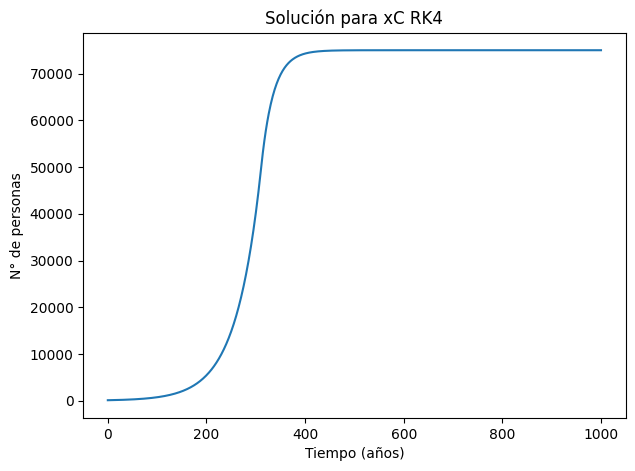

In [13]:
# Figura y tamaño de la figura

plt.figure(figsize=(7,5))

# Gráfico
plt.plot(I,XC)

# Título
plt.title("Solución para xC RK4")

# Ejes
plt.xlabel("Tiempo (años)")
plt.ylabel("N° de personas")

# Mostramos la figura
plt.show()

Vuelva a obtener soluciones ahora con pasos 2^ -1 y 2^−2 y vuelva a graficar, debe hacer un solo
gráfico para cada paso, en donde deben estar las soluciones dadas por cada método. Calcule
error de los métodos con respecto a una solución numérica obtenida con Runge Kutta de
orden 4 y paso temporal 2^−8
, esto debe hacerlo para cada método y cada paso definido antes. Note que esto implica restar 2 arreglos de largos distintos.

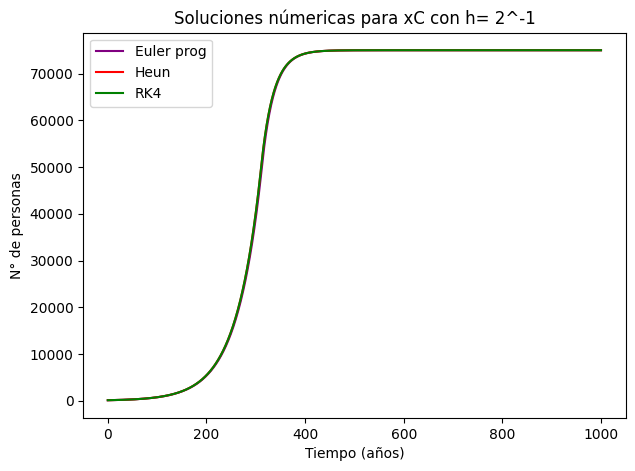

In [14]:
#Definimos
h1=2**(-1)
tf=1000
ti=0

N1= int((tf-ti)/h1)
#Creamos una matriz de N1 filas y 3 columnas, donde cada columna contendrá \\
#la solución numérica asociada a cada método
Xc=np.zeros((N1,3))

#Primera columna tendrá la solución numérica obtenida con Euler progresivo
I1, Xc[:,0] = Euler_prog(f,0,1000,x_Co,N1,b1)

#La segunda columna obtenida mediante el algoritmo de Heun
I1, Xc[:,1] = Heun(f,0,1000,x_Co,h1)

#La tercera Runge Kutta 4
I1, Xc[:,2] = RK4(f,0,1000,x_Co,h1)


#Y finalmente graficamos:
fig = plt.figure(figsize=(7,5))

# Debemos agregar tantos plots como funciones deseemos graficar
plt.plot(I1,Xc[:,0], c="purple", label="Euler prog")
plt.plot(I1,Xc[:,1], c="red", label="Heun")
plt.plot(I1,Xc[:,2], c="green", label="RK4")

# Agregamos título
plt.title("Soluciones númericas para xC con h= 2^-1")

# Agregamos ejes
plt.xlabel("Tiempo (años)")
plt.ylabel("N° de personas")

# Agregamos leyendas
plt.legend()

# Mostramos
plt.show()





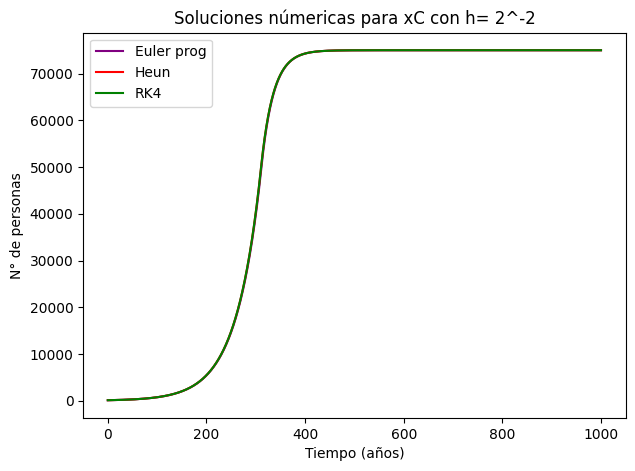

In [15]:
#Repetimos el algoritmo anterior considerando h=2^-2

h2=2**(-2)
N2= int((tf-ti)/h2)
xC=np.zeros((N2,3))


I2, xC[:,0] = Euler_prog(f,0,1000,x_Co,N2,b1)

I2, xC[:,1] = Heun(f,0,1000,x_Co,h2)

I2, xC[:,2] = RK4(f,0,1000,x_Co,h2)

#Y finalmente graficamos:
fig = plt.figure(figsize=(7,5))

# Debemos agregar tantos plots como funciones deseemos graficar
plt.plot(I2,xC[:,0], c="purple", label="Euler prog")
plt.plot(I2,xC[:,1], c="red", label="Heun")
plt.plot(I2,xC[:,2], c="green", label="RK4")


# Agregamos título
plt.title("Soluciones númericas para xC con h= 2^-2")

# Agregamos ejes
plt.xlabel("Tiempo (años)")
plt.ylabel("N° de personas")

# Agregamos leyendas
plt.legend()

# Mostramos
plt.show()




In [16]:
#Finalmente, calculamos el error de los métodos c/r a una solución obtenida con RK4 y paso temporal 2^-8

h3= 2**-8
I3, xc=RK4(f,0,1000,x_Co,h3)

#error Euler progresivo con h=1
error1= np.linalg.norm(xc[range(0,len(xc)-1,int(len(xc)/len(x_C)))]-x_C)
print("Error de Euler progresivo h=1 respecto a RK4 h=2^-8:", error1)

#error Heun con h=1
error2= np.linalg.norm(xc[range(0,len(xc)-1,int(len(xc)/len(X)))]-X)
print("Error para Heun h=1:", error2)

#error RK4 h=1
error3= np.linalg.norm(xc[range(0,len(xc)-1,int(len(xc)/len(XC)))]-XC)
print("Error para RK4 con h=1:", error3)

#error Euler progresivo con h=2^-1
error4=np.linalg.norm(xc[range(0,len(xc)-1,int(len(xc)/len(Xc[:,0])))]-Xc[:,0])
print("Error para Euler progresivo con h=2^-1:", error4)


#error Heun con h=2^-1
error5=np.linalg.norm(xc[range(0,len(xc)-1,int(len(xc)/len(Xc[:,1])))]-Xc[:,1])
print("Error para Heun con h=2^-1:",error5)

#error RK4 con h=2^-1
error6=np.linalg.norm(xc[range(0,len(xc)-1,int(len(xc)/len(Xc[:,2])))]-Xc[:,2])
print("Error para RK4 h=2^-1:",error6)

#error Euler progresivo con h=2^-2
error7=np.linalg.norm(xc[range(0,len(xc)-1,int(len(xc)/len(xC[:,0])))]-xC[:,0])
print("Error para Euler progresivo con h=2^-2:",error7)

#error Heun con h=2^-2
error8=np.linalg.norm(xc[range(0,len(xc)-1,int(len(xc)/len(xC[:,1])))]-xC[:,1])
print("Error para Heun con h=2^-2:",error8)

#error RK4 con h=2^-2
error9=np.linalg.norm(xc[range(0,len(xc)-1,int(len(xc)/len(xC[:,2])))]-xC[:,2])
print("Error para RK4 con h2^-2:",error9)

Error de Euler progresivo h=1 respecto a RK4 h=2^-8: 17502.430181172793
Error para Heun h=1: 140.44688915373808
Error para RK4 con h=1: 1.9030687270326738
Error para Euler progresivo con h=2^-1: 12401.273927909275
Error para Heun con h=2^-1: 51.75469961169441
Error para RK4 h=2^-1: 2.2059222478819103
Error para Euler progresivo con h=2^-2: 8774.169972965752
Error para Heun con h=2^-2: 16.60375827239473
Error para RK4 con h2^-2: 0.2663595095154115


Parte 2: Sociedad sin élites

Para esta parte solo consideraremos xE ≡ 0, por lo que quedan solamente 3 ecuaciones y 3 incógnitas
en el sistema:

$x'_C = b_1*x_C - a_1*x_C$ \\
$y'= ry*(L-y) - Dx_Cy$ \\
$a'= Dx_Cy - C_c - C_E$


In [17]:
# a) programamos la función que calcula la función del lado derecho

args1=[a_s,ah,b1,b2,s,p,r,xE,L,k]
y0=L
a0=0
#vector situación inicial
Y0=[x_Co,y0,a0]

def F(t,Y,args1):
    a_s,ah,b1,b2,s,p,r,xE,L,k = args1
    xE=0
    xC1,y1,A = Y
    dxC= b1*xC1 - a1(ah,a_s,s,A,p,k,xC1,xE)*xC1 #la d denota la operación derivada
    dy= r*y1*(L-y1) - D*xC1*y1
    da= D*xC1*y1 - CC(s,xC1,A,p,k,xE) - cE(k,s,A,p,xE,xC1)

    return np.array([dxC,dy,da])


e= (ah - b1)/(ah - a_s)
D=2*e*s/L#redefinimos D
Xcurs = (r/D)*(L- e*(s/D))


Si derivamos la expresión $X_{curs}$ e igualamos a 0, resulta:

$\frac{dX_{curs}}{dD} = -\frac{r}{D}\cdot \frac{ e\cdot s}{D^2} + \frac{r}{D^2}\cdot (L - \frac{e\cdot s}{D}) = 0 $  \\


$\iff $ $\frac{r}{D^2}\cdot (\frac{e\cdot s}{D})= \frac{r}{D^2}\cdot (L - \frac{e\cdot s}{D})$



De lo cual, simplificamos la expresión $r/D^2$ a ambos lados de la igualdad, y finalmente despejamos D, resultando:

$\frac{e\cdot s}{D} = L - \frac{e\cdot s}{D} $

$\iff$ $\widehat{D} = \frac{2 e\cdot s}{L}$

Para cerciorarnos de que $\widehat{D}$ entrega un máximo y no un mínimo, estudiamos la segunda derivada de $X_{curs}$:

$\frac{d^2X_{curs}}{dD^2}= \frac{4\cdot (r\cdot e\cdot s)}{D^4} - \frac{2r}{D^3}\cdot (L - \frac{e\cdot s}{D}) $

Notemos que para $D=\widehat{D}$:

$\frac{d^2X_{curs}}{dD^2}=\frac{L\cdot r}{4\cdot e^3\cdot s^3} - \frac{L\cdot r}{e^3\cdot s^3}\cdot (L - \frac{L}{2})$

$\iff$

$\frac{d^2X_{curs}}{dD^2}=\frac{L\cdot r}{4\cdot e^3\cdot s^3} - \frac{L^2\cdot r}{2e^3\cdot s^3} = \frac{Lr\cdot (1-2L)}{4e^3\cdot s^3}$

Expresión que resulta ser menor a 0, por lo tanto, $\widehat{D}$ es un máximo de $X_{curs}$, y además, para $\widehat{D}:$

$X_{max} = \frac{r}{\widehat{D}}\cdot (L - \frac{L\cdot e\cdot s}{2\cdot e\cdot s})= \frac{rL}{2\widehat{D}}$.

Demostrado esto, buscamos una solución para el modelo


Text(0, 0.5, 'Soluciones')

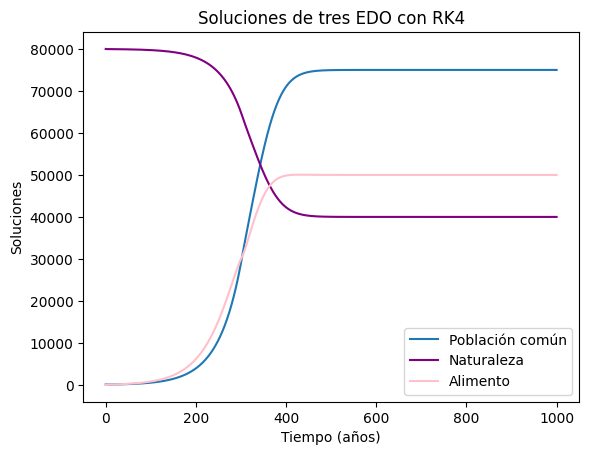

In [18]:

#vamos a simular la solución de Y con RK4.
#Definimos de nuevo el método pues en la función original\\
#def RK4 se define un arreglo de 1xN, y en este caso precisamos\\
#de una matriz de Nx3, donde cada columna contendrá cada solución de las funciones
def RK41(F,ti,tf,Y0,h,args):
   N= int((tf-ti)/h)
   I= np.linspace(ti,tf,N)
   X= np.zeros((N,3))
   X[0]= Y0 #la primera fila de la matriz contendrá las condiciones iniciales\\
   #X[0]=[x_Co,y0,a0]
   for i in range(N-1):
     g1= F(I[i],X[i],args)
     g2= F(I[i] + h/2, X[i]+h/2*g1 , args)
     g3= F(I[i]+h/2, X[i]+h/2*g2, args)
     g4= F(I[i+1], X[i] + h*g3, args)
     #recurrencia
     X[i+1]= X[i] + h/6*(g1 + 2*g2 + 2*g3 + g4)
   return (I,X)

#En este caso Y4 contiene a los vectores solución xC1, y, a
I, Y4 =RK41(F,0,1000,Y0,1,args1)

#xC1
plt.plot(I,Y4[:,0],label="Población común")

#y1, amplificado por 8L
plt.plot(I,Y4[:,1]*8*L, c="purple",label="Naturaleza") #

#A, amplificado por 2L
plt.plot(I,Y4[:,2]*2*L, c="pink",label="Alimento")
plt.legend()

plt.title("Soluciones de tres EDO con RK4")

# Ejes
plt.xlabel("Tiempo (años)")
plt.ylabel("Soluciones")



Naturalmente, la solución para $x_C$ que representa la población común, mantiene un comportamiento idéntico a las programadas para la parte 1. Por otro lado, las soluciones numéricas para y e a, que representan los recursos naturales disponibles y el alimento que mantiene la población humana, respectivamente, fueron amplificadas por 8L y 2L por indicación del enunciado, donde L=10^2. El gráfico revela que a medida que aumenta la población, los recursos naturales van disminuyendo, y, además, el alimento consumido por la población crece en conjunto con ésta. Las tres funciones, intuitivamente, se mantienen constantes cuando una lo hace. Nótese que en este parte del modelamiento, la población que representa a la élite no existe. \\

Recordemos que el límite de carga de la naturaleza está en su máximo, pues se consideró $D=\widehat{D}$.

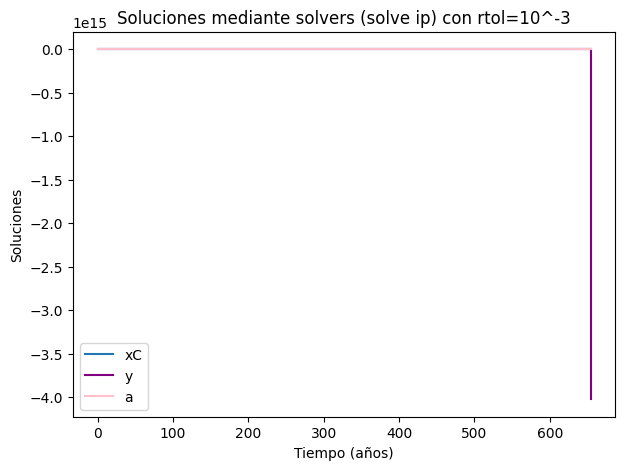

In [19]:
#c) Por indicación del enunciado:

D= 5.5*2*e*s/L

sol= solve_ivp(F, (0,1000), Y0, args = (args1,), rtol=10**(-3))
sol1= solve_ivp(F, (0,1000), Y0, args = (args1,), rtol=10**(-12))


#sol devuelve un diccionario
I, Y5 = sol["t"], sol["y"] #donde Y5 es una matriz de 3XN
T, H, M= Y5[0], Y5[1], Y5[2] #La primera fila contiene la solución xC1, la \\
#la segunda y1, y la tercera A.

# Figura y tamaño de la figura
plt.figure(figsize=(7,5))

# Gráfico solo para x con respecto al tiempo
plt.plot(I, T,label="xC")
plt.plot(I, H*L, c="purple", label="y")
plt.plot(I, M*L, c="pink", label="a")

# Título
plt.title("Soluciones mediante solvers (solve ip) con rtol=10^-3")

# Ejes
plt.xlabel("Tiempo (años)")
plt.ylabel("Soluciones")

# Leyendas
plt.legend()

# Mostramos la figura
plt.show()

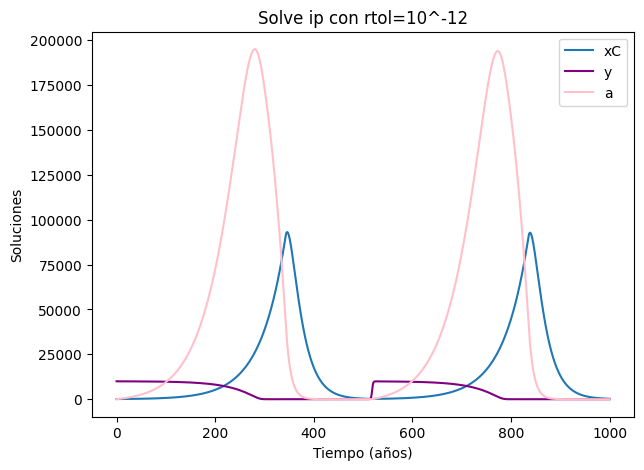

In [20]:
#sol1 devuelve un diccionario
I, Y5 = sol1["t"], sol1["y"] #donde Y5 es una matriz de 3XN
T, H, M= Y5[0], Y5[1], Y5[2] #La primera fila contiene la solución xC1, la \\
#la segunda y1, y la tercera A.

# Figura y tamaño de la figura
plt.figure(figsize=(7,5))

# Gráfico solo para x con respecto al tiempo
plt.plot(I, T, label="xC")
plt.plot(I, H*L, c="purple", label="y")
plt.plot(I, M*L, c="pink", label="a")

# Título
plt.title("Solve ip con rtol=10^-12")

# Ejes
plt.xlabel("Tiempo (años)")
plt.ylabel("Soluciones")

# Leyendas
plt.legend()

# Mostramos la figura
plt.show()

A medida que se va disminuyendo el parámetro rtol, se obtienen soluciones para el vector Y=[xC,y,a] más "óptimas". \\

En una sociedad sin élites, y con D un número grande (gran tasa de depredación de la naturaleza para producir alimentos) se puede inferir fácilmente que a medida que crezca la población, se explotarán más los recursos y por tanto, habrá una cantidad de alimento disponible de acuerdo a la misma tasa de aumento de la población. En el caso de las soluciones brindadas por los solvers, se ilustra una gran cantidad de alimento disponible cuando la población alcanza su máximo.

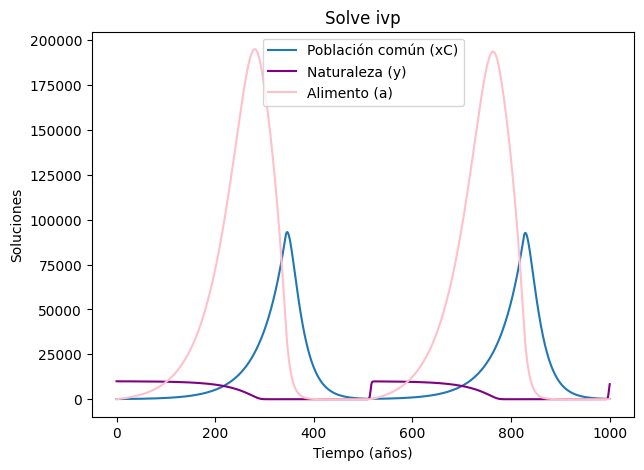

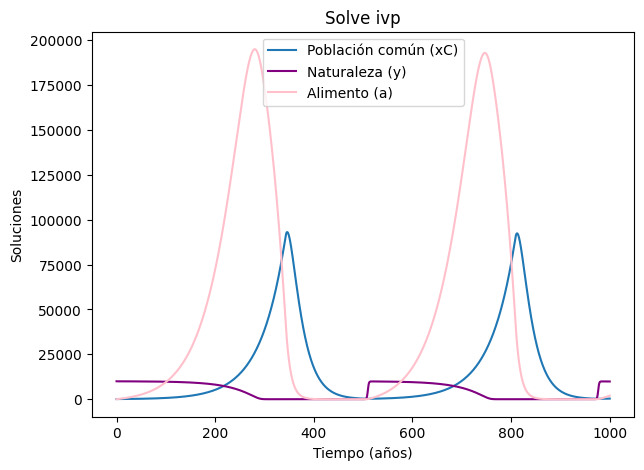

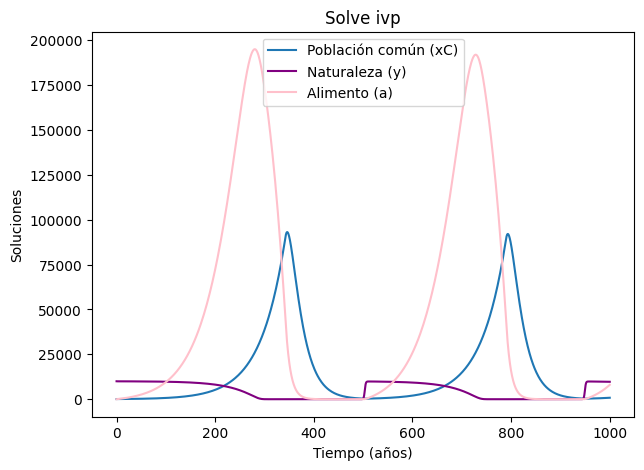

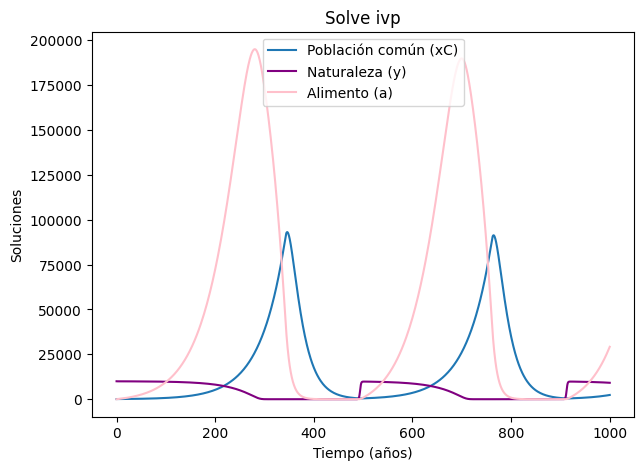

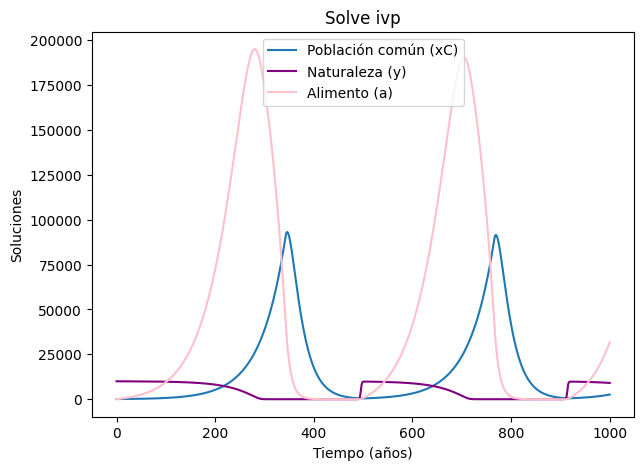

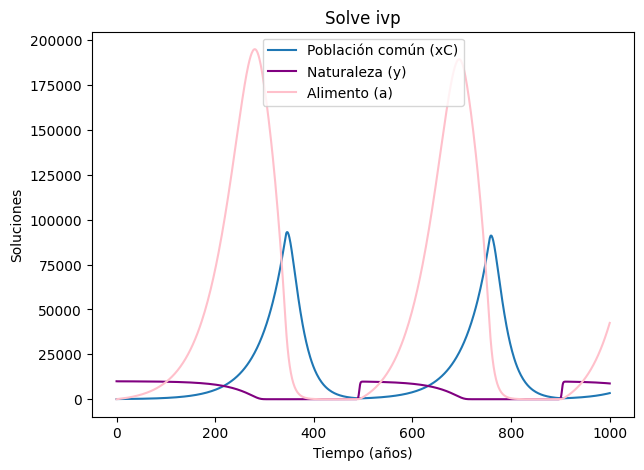

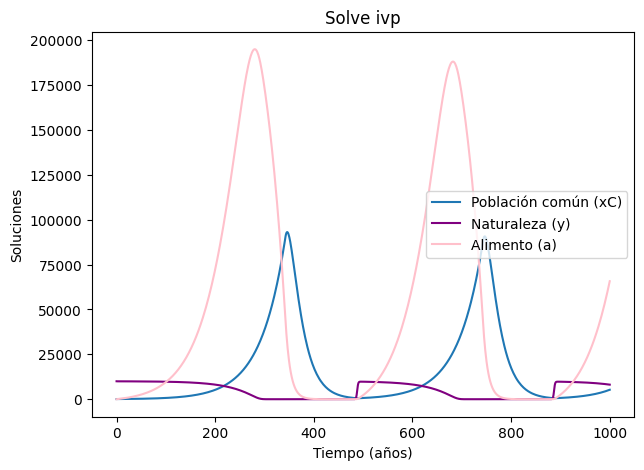

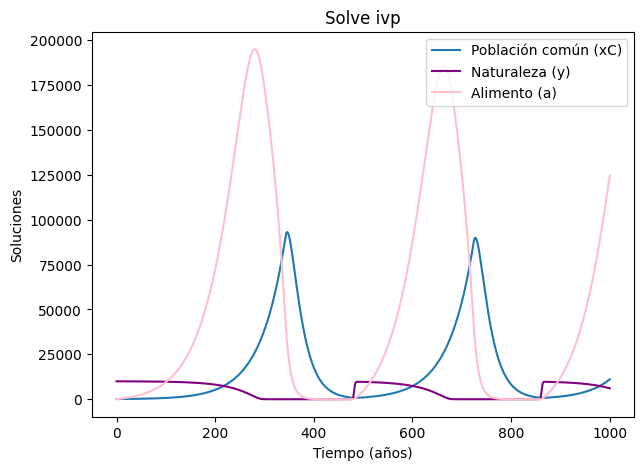

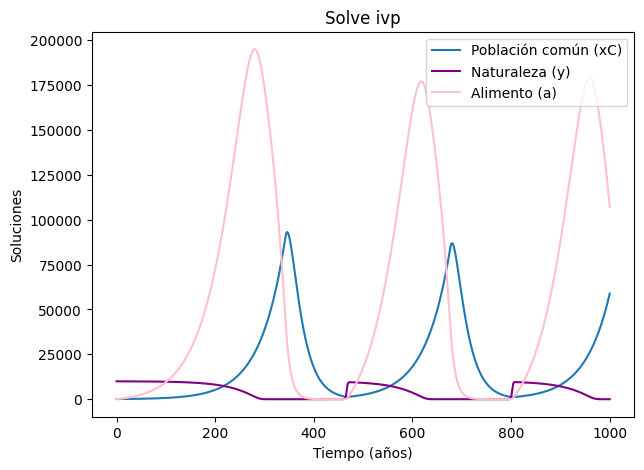

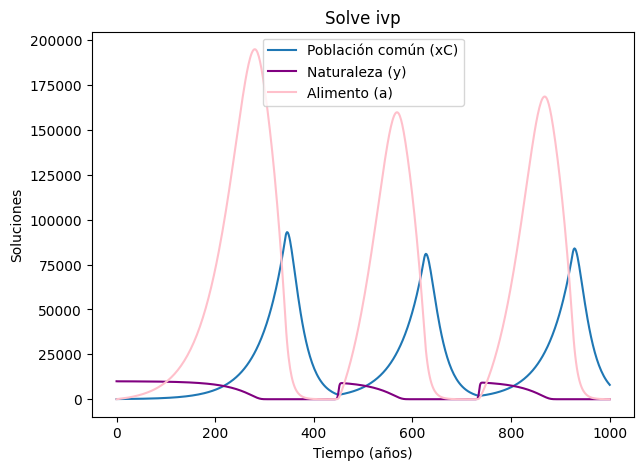

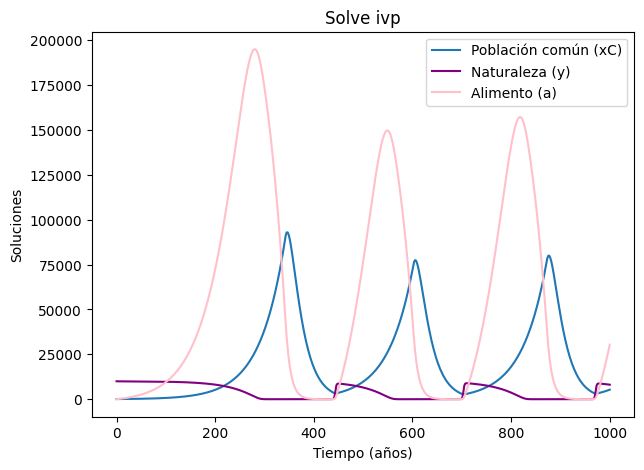

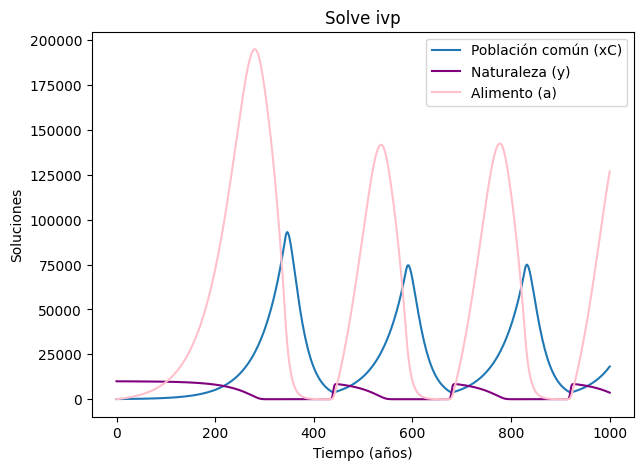

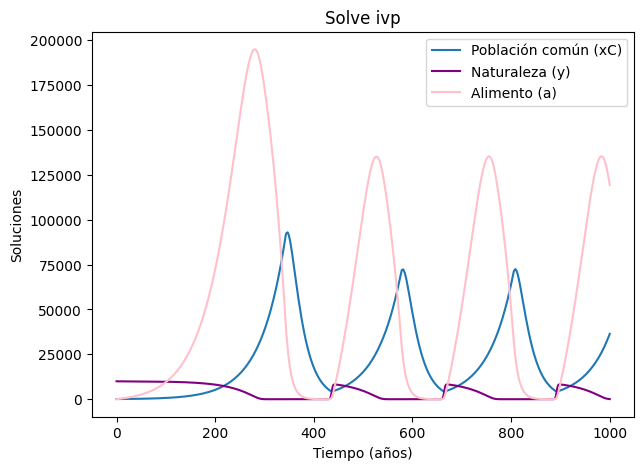

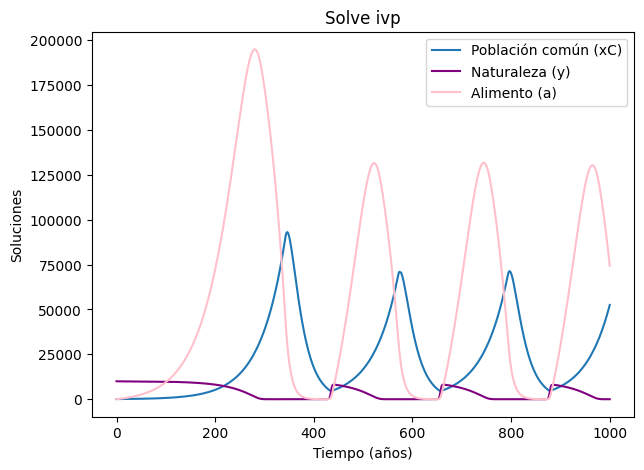

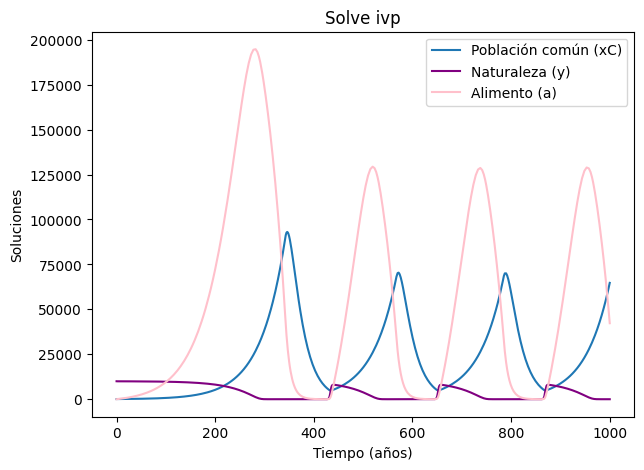

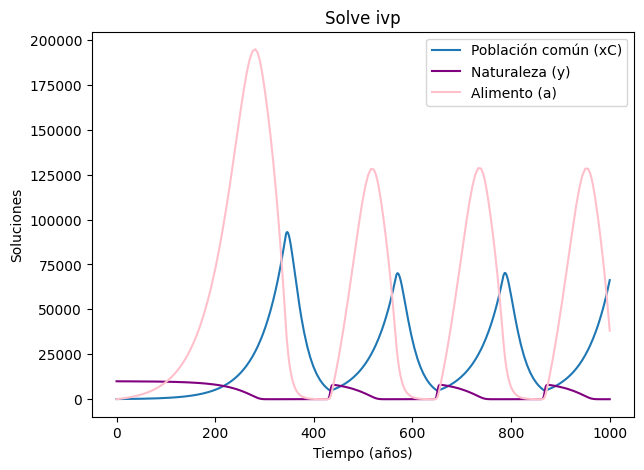

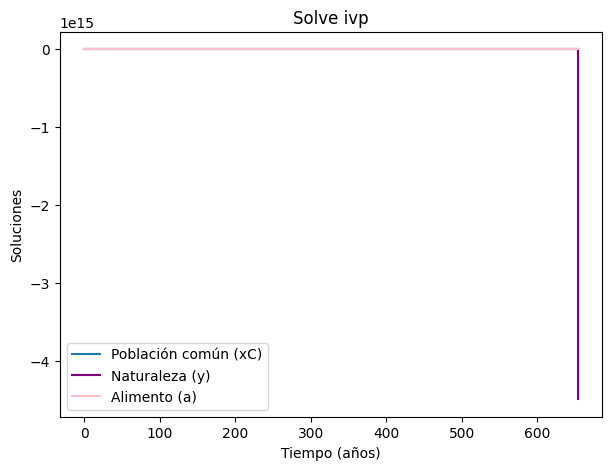

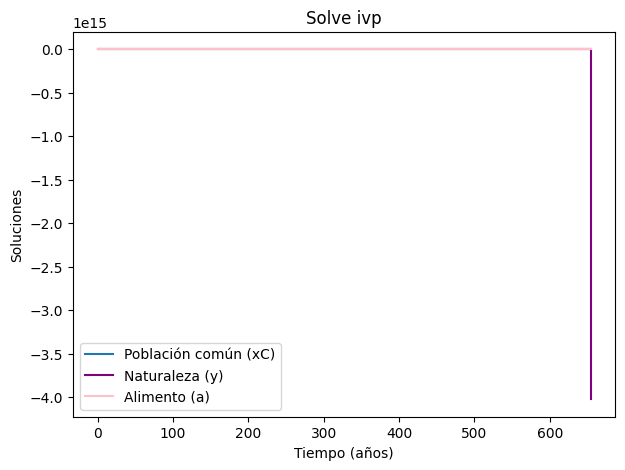

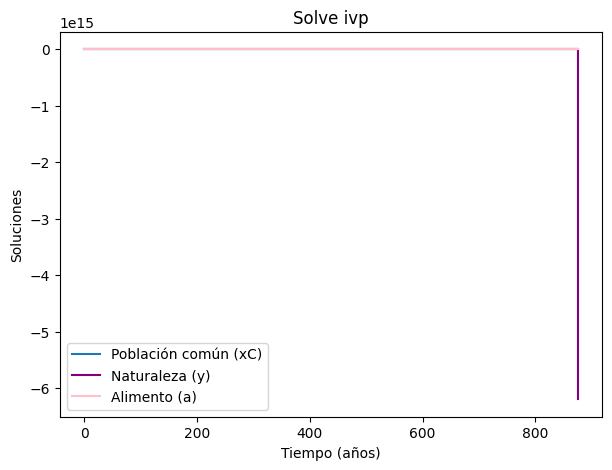

In [21]:
#Vamos a definir lo siguiente para ver cómo va evolucionando el gráfico a medida que\\
#el parámetro rtol se va haciendo más grande:
c = -12
while c <= -3:
    c+=0.5 #con pasos de 1/2 obtendremos 18 gráficos en total
    D=5.5*(2*e*s)/L
    sol=solve_ivp(F, (0, 1000), Y0,   args = (args1,), rtol=10**(c))
    I, X = sol["t"], sol["y"]
    T, H, M= X[0], X[1], X[2]
    plt.figure(figsize=(7,5))
    plt.plot(I, T, label="Población común (xC)")
    plt.plot(I, H*L, c="purple", label="Naturaleza (y)")
    plt.plot(I, M*L, c="pink", label="Alimento (a) ")
    plt.title("Solve ivp")
    plt.xlabel("Tiempo (años)")
    plt.ylabel("Soluciones")
    plt.legend()
    plt.show()


Para valores de rtol $\in$ [10^(-5),10^(-3)] el "alimento" (a) es una función constante que se mantiene en 0, mientras que los recursos disponibles "naturaleza" (y) se indetermina en un año específico.

Parte 3: Sociedad igualitaria (10 puntos)
Aquí consideraremos que xE ̸= 0, en donde xC y xE consumen la misma tasa de alimento, pero el
estrato xE no trabaja y por tanto no participa directamente en la depredación de la naturaleza.
Entonces llamaremos a xC como los trabajadores y a xE como los no trabajadores. Por tanto
tomaremos k = 1 y además elegiremos xE(0) = 25.


In [22]:
args=[a_s,ah,b1,b2,s,p,r,L,k]
k=1
xE0=25
y0=L
a0=0
X_0=[x_Co,xE0,y0,a0]

#a) Sea X(t)= (xC(t),xE(t),y(t),a(t))^T

#La función recibirá un X2 (arreglo), al desempaquetarlo\\
#podrá trabajar cada uno de sus elementos (escalares)\\
#de modo que las funciones de la parte 0 correrán sin reclamar\\
#ambigüedad por pretender operar arreglos como escalares.
def H(t,X2,args):
    a_s,ah,b1,b2,s,p,r,L,k = args#paso importante, desempaquetamos los elementos
    xC2, x_E, y2, A2= X2
    dxC= b1*xC2 - a1(ah,a_s,s,A2,p,k,xC2,x_E)*xC2
    dxE=b2*x_E - a2(ah,a_s,s,A2,p,k,xC2,x_E)*x_E
    dy= r*y2*(L-y2) - D*xC2*y2
    da= D*xC2*y2 - CC(s,xC2,A2,p,k,x_E) - cE(k,s,A2,p,x_E,xC2)

    return np.array([dxC,dxE,dy,da])

#b)
phi=xE0/(x_Co)
D=2*e*s/L*(1+phi)
Xcurs=r/D*(L-e*s/D*(1+phi))*(1+phi)

Al igual que en la parte 2), vamos a derivar $X_{curs}$ respecto a D, para buscar el punto donde la carga límite se maximiza:

$\frac{dX_{curs}}{dD}=\frac{-r}{D^2}\cdot (L - e\cdot \frac{s}{D}\cdot (1+ϕ))\cdot (1+\phi) + \frac{r}{D}\cdot e\cdot (1+\phi)^2\cdot \frac{s}{D^2} = 0$

$\iff \frac{r}{D^2}\cdot e\cdot (1+\phi)^2\cdot \frac{s}{D} = \frac{r}{D^2}\cdot (L - e\cdot \frac{s}{D}\cdot (1+ϕ))\cdot (1+\phi)$ \\


$\iff e\cdot \frac{s}{D}\cdot (1+\phi) = L - e\cdot \frac{s}{D}\cdot (1+\phi)$

$\iff \frac{2e\cdot s}{L}(1+\phi) = \tilde{D} $

Luego, determinamos la segunda derivada:

$\frac{d^2X_{curs}}{dD^2}= \frac{2r}{D^3}\cdot (L - e\cdot \frac{s}{D}\cdot (1+ϕ))\cdot (1+\phi)-e\cdot \frac{r\cdot s}{D^3}(1+\phi)-\frac{3r}{D^4}\cdot e(1+\phi)^2\cdot s$

A continuación, reemplazamos $D= \tilde{D}
$:

$\frac{d^2X_{curs}}{dD^2}(\tilde{D})= (\frac{2r}{\tilde{D}^3}\cdot L - 2e\cdot \frac{r\cdot s}{\tilde{D}^4}(1+\phi))(1+\phi) - e\cdot \frac{r\cdot s}{\tilde{D}^3}(1+\phi) - \frac{3r}{\tilde{D}^4}\cdot e(1+\phi)^2\cdot s $

$\iff \left( \frac{2r\cdot L}{8(e\cdot s)^3(1+\phi)^3} - \frac{2r\cdot L}{8(e\cdot s)^3(1+\phi)^3}\right)(1+\phi) - \frac{r\cdot L^3}{8(e\cdot s)^2\cdot (1+\phi)^2} - \frac{3r\cdot L^4}{16(e\cdot s)^3\cdot (1+\phi)^2} = - \frac{r\cdot L^3}{8(e\cdot s)^2\cdot (1+\phi)^2} - \frac{3r\cdot L^4}{16(e\cdot s)^3\cdot (1+\phi)^2} $

Como todas las constantes son positivos, los dos términos resultantes deben ser necesariamente negativos, por lo tanto, en $\tilde{D}$ se produce un máximo en la función límite de carga $X_{curs}.$

Finalmente, si reemplazamos $\tilde{D}$ en la función ésta resulta:

$X_{curs}(\tilde{D})= \frac{r\cdot L}{2e\cdot s(1+\phi)}\left(L - \frac{L}{2}\right)(1+\phi) = \frac{r\cdot L}{2\tilde{D}} (1+\phi) = X_M $

Text(0, 0.5, 'Soluciones')

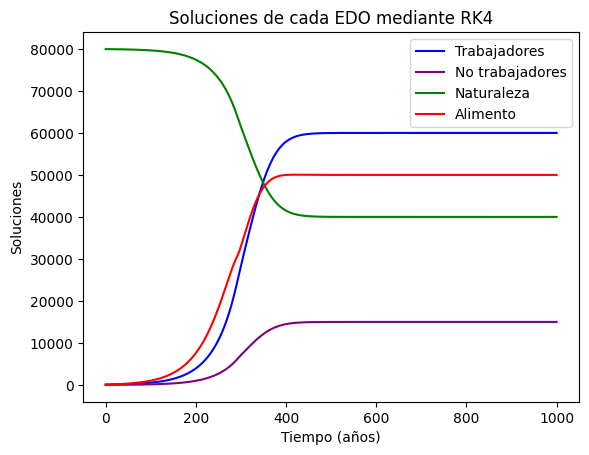

In [23]:
args=[a_s,ah,b1,b2,s,p,r,L,k]
k=1
xE0=25
y0=L
a0=0
X_0=[x_Co,xE0,y0,a0]

#a) Sea X(t)= (xC(t),xE(t),y(t),a(t))^T

#La función recibirá un X2 (arreglo), al desempaquetarlo\\
#podrá trabajar cada uno de sus elementos (escalares)\\
#de modo que las funciones de la parte 0 correrán sin reclamar\\
#ambigüedad por pretender operar arreglos como escalares.
def H(t,X2,args):
    a_s,ah,b1,b2,s,p,r,L,k = args#paso importante, desempaquetamos los elementos
    xC2, x_E, y2, A2= X2
    dxC= b1*xC2 - a1(ah,a_s,s,A2,p,k,xC2,x_E)*xC2
    dxE=b2*x_E - a2(ah,a_s,s,A2,p,k,xC2,x_E)*x_E
    dy= r*y2*(L-y2) - D*xC2*y2
    da= D*xC2*y2 - CC(s,xC2,A2,p,k,x_E) - cE(k,s,A2,p,x_E,xC2)

    return np.array([dxC,dxE,dy,da])

#b)
phi=xE0/(x_Co)
D=2*e*s/L*(1+phi)
Xcurs=r/D*(L-e*s/D*(1+phi))*(1+phi)
#Nuevamente utilizaremos RK4
def RK42(H,ti,tf,X_0,h,args):
   N= int((tf-ti)/h)
   I= np.linspace(ti,tf,N)
   X1= np.zeros((N,4))
   #La primera fila de la matriz X1 tendrá las condiciones iniciales
   X1[0]= X_0#=[x_C0,xE0,y0,a0] con esto se comienza la recursión
   for i in range(N-1):
     #como H acepta arreglos de 1x4, se le irá dando cada fila de la matriz X1
     #y H desempaqueterá los elementos de cada fila.
     g1= H(I[i], X1[i] , args)
     g2= H(I[i] + h/2 , X1[i]+h/2*g1 , args)
     g3= H(I[i]+h/2, X1[i]+h/2*g2, args)
     g4= H(I[i+1], X1[i] + h*g3, args)

     X1[i+1]= X1[i] + h/6*(g1 + 2*g2 + 2*g3 + g4)

   return (I,X1)

#En este caso X2 contiene a los vectores solución xC2, x_E,y2, A2
I, X2 = RK42(H,0,1000,X_0,1,args)

#xC "población común"
plt.plot(I,X2[:,0], c="blue", label="Trabajadores")

#xE "élite"
plt.plot(I,X2[:,1], c="purple",label="No trabajadores")

#y, amplificado por 8L
plt.plot(I,X2[:,2]*8*L, c="green",label="Naturaleza")

#a, amplificado por 2L
plt.plot(I,X2[:,3]*2*L, c="red",label="Alimento")
plt.legend()

plt.title("Soluciones de cada EDO mediante RK4")

# Ejes
plt.xlabel("Tiempo (años)")
plt.ylabel("Soluciones")


Notemos que en esta parte, se dice que la "élite" (personas no trabajadoras), no depredan recursos naturales, y, además, se habla de una sociedad igualitaria,por lo que es perfectamente lógico que las soluciones de xC,y,a sean iguales a las modeladas con RK4 en la parte 2) donde xE=0, pues los recursos explotados son los mismos, y el alimento se reparte equitativamente entre la población.

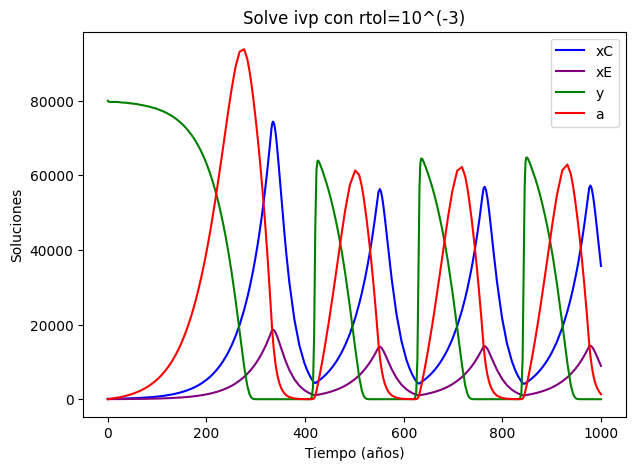

In [24]:
D=5*2*e*s/L*(1+phi)

sol2= solve_ivp(H, (0,1000), X_0, args = (args,), rtol=10**(-3))

#sol devuelve un diccionario
I, X3 = sol2["t"], sol2["y"] #donde X3 es una matriz de 4XN
T, H, M, U= X3[0], X3[1], X3[2], X3[3]

# Figura y tamaño de la figura
plt.figure(figsize=(7,5))

# Gráfico solo para x con respecto al tiempo
plt.plot(I, T, c="blue",label="xC")
plt.plot(I, H, c="purple", label="xE")
plt.plot(I, M*8*L, c="green", label="y")
plt.plot(I, U*L/2, c="red", label="a")

# Título
plt.title("Solve ivp con rtol=10^(-3)")

# Ejes
plt.xlabel("Tiempo (años)")
plt.ylabel("Soluciones")

# Leyendas
plt.legend()

# Mostramos la figura
plt.show()

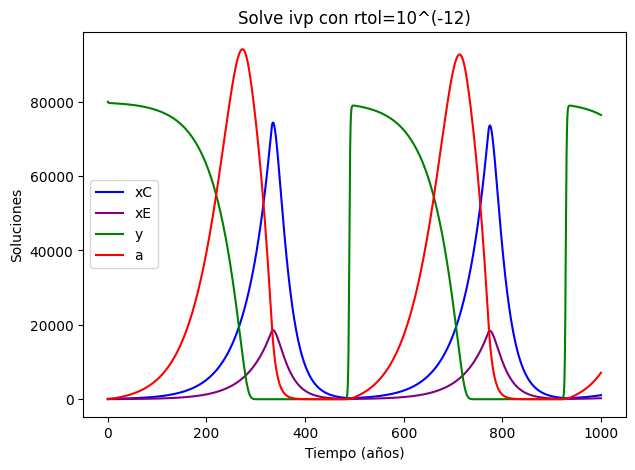

In [25]:
#Lo definí de nuevo porque collab se cae a cada rato y no me lee las celdas anteriores
def H(t,X2,args):
    a_s,ah,b1,b2,s,p,r,L,k = args
    xC2, x_E, y2, A2= X2
    dxC= b1*xC2 - a1(ah,a_s,s,A2,p,k,xC2,x_E)*xC2
    dxE=b2*x_E - a2(ah,a_s,s,A2,p,k,xC2,x_E)*x_E
    dy= r*y2*(L-y2) - D*xC2*y2
    da= D*xC2*y2 - CC(s,xC2,A2,p,k,x_E) - cE(k,s,A2,p,x_E,xC2)

    return np.array([dxC,dxE,dy,da])


sol3= solve_ivp(H, (0,1000), X_0, args = (args,), rtol=10**(-12))

#sol devuelve un diccionario
I, X4 = sol3["t"], sol3["y"] #donde X4 es una matriz de 4XN
J, V, S, B= X4[0], X4[1], X4[2], X4[3]

# Figura y tamaño de la figura
plt.figure(figsize=(7,5))

# Gráfico solo para x con respecto al tiempo
plt.plot(I, J, c="blue",label="xC")
plt.plot(I, V, c="purple", label="xE")
plt.plot(I, S*8*L, c="green", label="y")
plt.plot(I, B*L/2, c="red", label="a")

# Título
plt.title("Solve ivp con rtol=10^(-12)")

# Ejes
plt.xlabel("Tiempo (años)")
plt.ylabel("Soluciones")

# Leyendas
plt.legend()

# Mostramos la figura
plt.show()

La solución programada con solvers también tiene sentido: cuando se producen peaks de población común, de élite y de alimento, significa que se ha depredado al máximo los recursos disponibles (además, en esta parte, D es grande). Por otro lado, en los años donde las poblaciones se hacen 0, la función que representa los recursos naturales se "indefine", lo que da a entender que no existe un "límite de carga" de la naturaleza.

Parte 4: Sociedad desigual \\
En esta parte consideraremos que k ≫ 1, es decir un escenario en que la élite consume muchos más
alimentos que los comunes.

Text(0, 0.5, 'Soluciones')

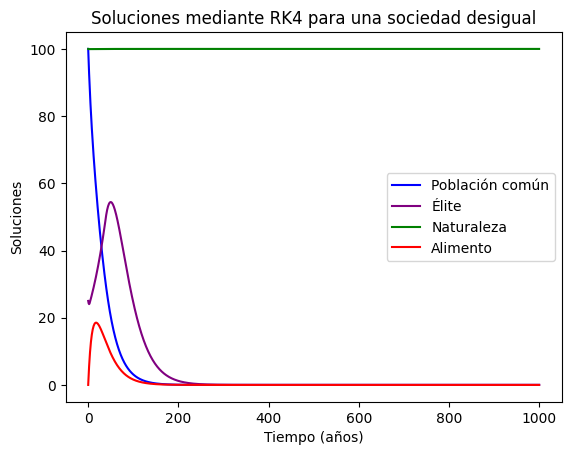

In [26]:

def H(t,X2,args):
    a_s,ah,b1,b2,s,p,r,L,k = args#paso importante, desempaquetamos los elementos
    xC2, x_E, y2, A2= X2
    dxC= b1*xC2 - a1(ah,a_s,s,A2,p,k,xC2,x_E)*xC2
    dxE=b2*x_E - a2(ah,a_s,s,A2,p,k,xC2,x_E)*x_E
    dy= r*y2*(L-y2) - D*xC2*y2
    da= D*xC2*y2 - CC(s,xC2,A2,p,k,x_E) - cE(k,s,A2,p,x_E,xC2)

    return np.array([dxC,dxE,dy,da])

D= 6.35*10**(-6)
k=10
args=[a_s,ah,b1,b2,s,p,r,L,k]
xE0=25
y0=L
a0=0
X_0=[x_Co,xE0,y0,a0]

I,X4=RK42(H,0,1000,X_0,1,args)

#xC "población común"
plt.plot(I,X4[:,0], c="blue", label="Población común")

#xE "élite"
plt.plot(I,X4[:,1], c="purple",label="Élite")

#y
plt.plot(I,X4[:,2], c="green",label="Naturaleza")

#a, amplificado por L/2
plt.plot(I,X4[:,3]*L/2, c="red",label="Alimento")
plt.legend()

plt.title("Soluciones mediante RK4 para una sociedad desigual")

# Ejes
plt.xlabel("Tiempo (años)")
plt.ylabel("Soluciones")


Aquí, como el factor de desigualdad es muy grande, es lógico que la población común (xC) vaya desapareciendo a través de los años. Además, D, que corresponde a la tasa con la que gente común depreda los recursos disponibles para producir alimentos, es bastante baja. Esto sumado a la progresiva desaparición de los comunes, inevitablemente desemboca en una escasez severa de alimentos, lo que finalmente termina por ir reduciendo a la élite, mientras la naturaleza permanece constante pues ya no hay nadie que la explote. \\

En conclusión, una sociedad profundamente desigual está condenada a extinguirse.

Text(0, 0.5, 'Soluciones')

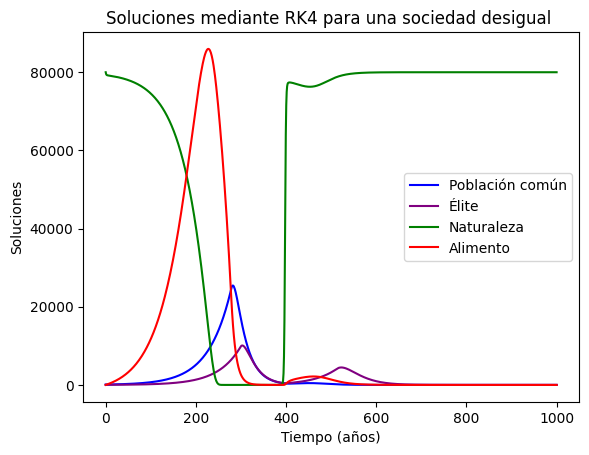

In [27]:
D=pow(10,-4)

I,X5=RK42(H,0,1000,X_0,1,args)

#xC "población común"
plt.plot(I,X5[:,0], c="blue", label="Población común")

#xE "élite"
plt.plot(I,X5[:,1], c="purple",label="Élite")

#y, amplificado por 8L
plt.plot(I,X5[:,2]*8*L, c="green",label="Naturaleza")

#a, amplificado por L/2
plt.plot(I,X5[:,3]*L/2, c="red",label="Alimento")
plt.legend()

plt.title("Soluciones mediante RK4 para una sociedad desigual ")
# Ejes
plt.xlabel("Tiempo (años)")
plt.ylabel("Soluciones")

El gráfico indica que se produce mucho alimento a medida que va creciendo la población, lo cual tiene sentido en un modelo de sociedad donde el parámetro D es grande. En consonancia con esto mismo, los recursos naturales se depredan rápidamente, lo cual, naturalmente, desencadena una escasez y la población termina desapareciendo. Una vez ocurre esto, la naturaleza vuelve al equilibrio representando una función constante.